In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('~/Desktop/NLP/smsspamcollection/SMSSpamCollection',error_bad_lines=False,sep='\t',header=None)
df.columns=['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

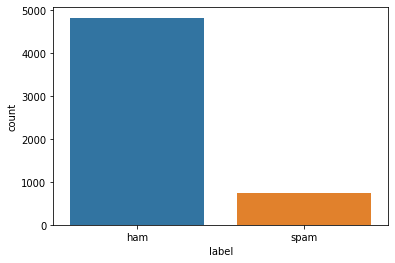

In [8]:
sns.countplot(df['label'])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
num=df['label'].replace(['ham','spam'],[0,1])

In [11]:
df['label_num']=num

In [12]:
df.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [13]:
df['msg_len']=df['message'].apply(len)

In [14]:
df.head(10)

,label,message,label_num,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,157
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


In [15]:
df[df['label_num']==0].describe()

,label_num,msg_len
count,4825.0,4825.000000
mean,0.0,71.482487
std,0.0,58.440652
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


In [16]:
df[df['label_num']==1].describe()

,label_num,msg_len
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


In [17]:
df[['message']].loc[2]

message    Free entry in 2 a wkly comp to win FA Cup fina...
Name: 2, dtype: object

In [15]:
df[df['msg_len']==910]['message'].loc[1085]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
df[df['msg_len']==223]['message'].loc[1734]

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

In [17]:
import nltk
import string


### Converting into lower characters

In [18]:
message=df['message'].apply(lambda x: str(x))

In [19]:
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

### applying RE

In [20]:
import re

In [21]:
message_re=message.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',str(x)))

In [22]:
message_re

0       Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni   
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say   
4       Nah I don t think he goes to usf  he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will   b going to esplanade fr home 
5569    Pity    was in mood for that  So   any other s...
5570    The guy did some bitching but I acted like i d...
5571                           Rofl  Its true to its name
Name: message, Length: 5572, dtype: object

# Word tokenization

In [23]:
message_word=message_re.apply(lambda x : nltk.word_tokenize(x))

In [24]:
print(message_word[0])

['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat']


In [25]:
message_word

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, don, t, think, he, goes, to, usf, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568            [Will, b, going, to, esplanade, fr, home]
5569    [Pity, was, in, mood, for, that, So, any, othe...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                     [Rofl, Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

## parts of speech tag

In [26]:
from nltk import pos_tag

In [27]:
x=pos_tag(nltk.word_tokenize('Hii, How slowly are you in ?'),tagset=None)

In [28]:
x

[('Hii', 'NNP'),
 (',', ','),
 ('How', 'NNP'),
 ('slowly', 'RB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('in', 'IN'),
 ('?', '.')]

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python

In [29]:
from nltk.corpus import wordnet
wordnet.ADV

'r'

In [30]:
for a,b in x:
    print(a)

Hii
,
How
slowly
are
you
in
?


In [31]:
from nltk.stem import WordNetLemmatizer
lr=WordNetLemmatizer()
from nltk.corpus import stopwords


In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def text_normalization(text):
    text=text.lower() #lowering the sentences
    message_re=re.sub(r'[^a-zA-Z]',' ',text) #applying re
    message_word=nltk.word_tokenize(message_re) #word tokenize
    message_pun=[x for x in message_word if x not in string.punctuation] #removing punctuation
    msg_stopwrds=[i for i in message_pun if i not in set(stopwords.words('english'))] #removing stopwords
    lr=WordNetLemmatizer()
    tag_list=pos_tag(msg_stopwrds,tagset=None)
    #print(tag_list)
    lemma_words=[]
    for a ,b in tag_list:
        
        if b.startswith('J'):  #adjective
            pos_val='a'
        elif b.startswith('V'):  #verb
            pos_val='v'
        elif b.startswith('R'):  #adverb
            pos_val='r'
        
        else:  #noun
            pos_val='n'
            
        lemma_tokenize=lr.lemmatize(a,pos_val)
        lemma_words.append(lemma_tokenize)
        
    x=' '.join(lemma_words)
    return x
        
    

In [34]:
text_normalization('telling u  some stuff is good??')

'tell u stuff good'

In [35]:
df['clean_msg']=df['message'].apply(lambda x : text_normalization(x))

In [36]:
df.head(10)

,label,message,label_num,msg_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,0,77,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,1,157,winner value network customer select receivea ...
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,mobile month u r entitle update late colour mo...


In [37]:
X=df['clean_msg']
Y=df['label_num']
print(X.shape)
print(Y.shape)

(5572,)
(5572,)


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [39]:
X_train

1915    new textbuddy chat horny guy ur area p free re...
1056                                     work please call
3717                  network technical support associate
5375               cant pick phone right pls send message
945     sent score sophas secondary application school...
                              ...                        
3335                    fine give call know want question
1099                   gift try get throw cliff something
2514    u nokia plus free digital camera u get u win f...
3606                            jordan get vote last nite
2575    next amazing xxx picsfree video send enjoy one...
Name: clean_msg, Length: 3900, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [41]:
X_train_CV=cv.fit_transform(X_train)
X_train_CV.shape


(3900, 5536)

In [42]:
X_test_cv=cv.transform(X_test)

In [43]:
X_test_cv.shape

(1672, 5536)

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [45]:
model=nb.fit(X_train_CV,y_train)

In [46]:
y_test_pred=model.predict(X_test_cv)

In [47]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
accuracy_score(y_test,y_test_pred)

0.9796650717703349

In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1445
           1       0.96      0.89      0.92       227

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



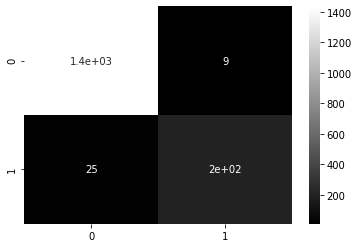

In [51]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap='gray')

In [52]:
print(confusion_matrix(y_test,y_test_pred))

[[1436    9]
 [  25  202]]


In [53]:
from sklearn.metrics import roc_auc_score,roc_curve

In [54]:
nb_probs=nb.predict_proba(X_test_cv)[:,1]

In [55]:
nb_probs

array([1.75729814e-05, 8.53705904e-04, 8.14017435e-02, ...,
       9.80286083e-04, 1.05582783e-07, 2.02775769e-02])

In [56]:
#find the area
nb_auc=roc_auc_score(y_test,nb_probs)
nb_auc

0.977168727039922

In [57]:
nb_fpr,nb_tpr,nb_th=roc_curve(y_test,nb_probs)

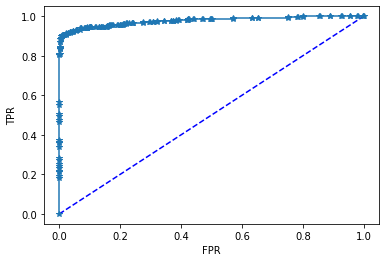

In [58]:
plt.plot([0,1],[0,1],'b--')
plt.plot(nb_fpr,nb_tpr,marker='*')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [59]:
z=text_normalization('Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....')

In [60]:
z

'hi mandy sullivan call hotmix fm choose receive easter prize draw please telephone claim prize transfer someone else'

In [61]:
a=cv.transform([z])

In [62]:
a.shape

(1, 5536)

In [63]:
model.predict(a)

array([1], dtype=int64)

In [64]:
def predict(text):
    z=text_normalization(text)
    a=cv.transform([z])
    x=model.predict(a)
    return x

In [87]:
predict("Hii this is from xyz  company you have won 1000 $ for participating in movie contest. Please  dail to this number 7894565334.Thank you visit this web site for further queries https://www.geeksforgeeks.org/numpy-hstack-in-python/#:~:text=hstack()%20function%20is%20used,to%20make%20a%20single%20array.&text=Parameters%20%3A,all%20but%20the%20second%20axis.")

array([1], dtype=int64)